# Breast Cancer Prediction

The primary goal of this notebook is to identify the most significant and/or correlated features that are associated with breast cancer diagnoses and gain a deeper understanding of the factors that contribute to the diagnosis of breast cancer. 

By identifying which features are most prominent, we can then use machine learning models to predict whether or not a person has breast cancer. The models are trained and evaluated based on their ability to predict whether a breast tumor is malignant (cancerous) or benign (non-cancerous). We will compare 4 models' performance along with an ensemble method. 

Through this comparative analysis, we aim to determine which model performs best in terms of accuracy, precision, recall, and other relevant metrics and convey how machine learning could aid in the early detection and treatment of breast cancer, thereby improving patient outcomes.

Here is a link to the [Github Repository](https://github.com/dlynch42/csca5622_final)

# Load Data
We will using the `load_breast_cancer` function from `sklearn.datasets` loads the Breast Cancer Wisconsin (Diagnostic) dataset.

The Breast Cancer Wisconsin (Diagnostic) dataset is a popular classification dataset.

The data was collected from digitized images of breast mass FNAs. The images were preprocessed to ensure consistent size and orientation. The dataset is not in multi-table form and is gathered from a single data source.

Please note that the dataset contains 569 samples/rows and 30 features/columns. If the file size is large, it is recommended to check the byte size for further details.

The dataset is useful for those who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. 

The data was collected from the results of digitized images of a fine needle aspirate (FNA) of a breast mass. The orginal images were digitized to an 8-bit grayscale and a resolution of 50 pixels per inch. The images were preprocessed to ensure a consistent size and orientation.

Some background on the dataset:

- **Number of Instances**: 569
- **Number of Attributes**: 30 numeric, predictive attributes and the class
- **Class Distribution**: 212 - Malignant, 357 - Benign

- **Attribute Information**: The dataset contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The attributes include radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. All of these attributes are real-valued.

- **Data Description**: The dataset is a binary classification problem, with the target variable having two possible values: 'malignant' and 'benign'. The dataset is useful for learning techniques and pattern recognition methods on real-world data, with minimal preprocessing and formatting efforts required.

Data Source: Breast Cancer Wisconsin (Diagnostic) Dataset, UCI Machine Learning Repository. [Link to the dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

Citation: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [1]:
# !pip install --upgrade pip
# !pip install --upgrade scikit-learn
# !pip install --upgrade seaborn
# !pip install --upgrade pandas
# !pip install statsmodels

In [2]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

# Ignore User Warnings
warnings.filterwarnings("ignore", category=UserWarning) 

In [3]:
# Load the Breast Cancer Wisconsin (Diagnostic) dataset
breast_cancer = load_breast_cancer()

# Create a dataframe from the breast cancer dataset
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df['Diagnosis'] = breast_cancer.target

# Exploratory Analysis
We are going to be conducting some exploratory analysis to take a look at the data we are working with. 

First, we will call `df.head()` to see the the columns and some example data in the first 5 rows. 

Next, we will group by `Diagnosis` to see what the dataset looks like depending on the diagnosis.

Lastly, we will visualize the data.

**Positive and Negative Feature Comparison**

* Visualize the distribution of the first 12 features in the dataset for both negative (benign) and positive (malignant) breast cancer diagnoses

**Heatmap**

* Represents a correlation matrix, which measures the linear relationships between variables. 

This exploratory analysis provides a visual understanding of the data and can help identify patterns, outliers, or relationships between the features.

In [4]:
# Perform exploratory analysis
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.groupby('Diagnosis').count()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Diagnosis,,,,,,,,,,,,,,,,,,,,,
0,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212
1,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357


In [6]:
df.groupby('Diagnosis').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Diagnosis,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [7]:
# Positive/negative diagnoses
df_positive = df[df['Diagnosis'] == 1]
df_negative = df[df['Diagnosis'] == 0]

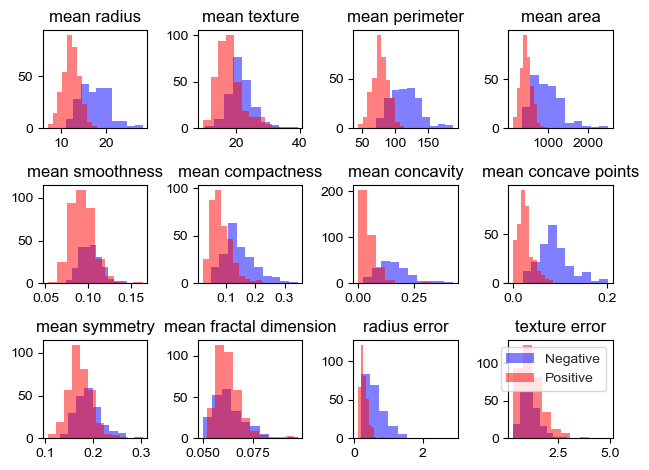

In [8]:
fig = plt.figure()

# Plot 12 tumor characteristics
for i, feature in enumerate(list(df.columns[:12])):
    i +=1
    ax = fig.add_subplot(3, 4, i)
    
    # Plot tumor charateristics, blue for negative, red for positive
    ax.hist(df_negative[feature], label='Negative', stacked=True, alpha=0.5, color='b')
    ax.hist(df_positive[feature], label='Positive', stacked=True, alpha=0.5, color='r')
    ax.set_title(feature)
    
sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

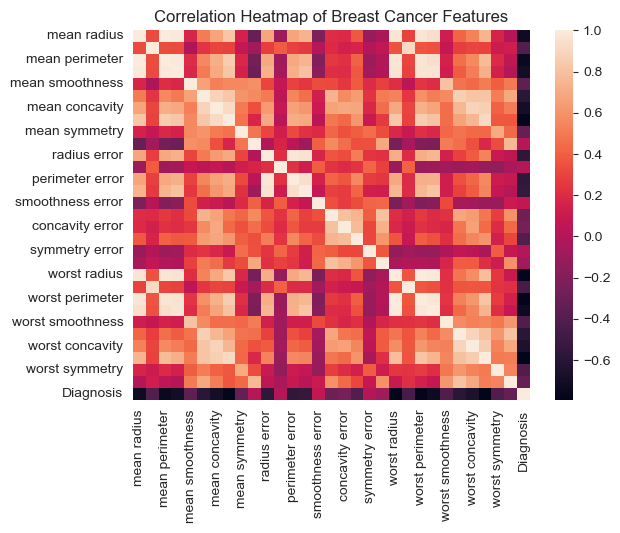

In [9]:
# Create a heatmap of the correlation between features
ax = sns.heatmap(df.corr())
ax.set_title('Correlation Heatmap of Breast Cancer Features')
sns.set_style("whitegrid")
plt.show()

# Preprocessing & Feature Engineering

Although the data has already been cleaned, we are going to prepare the dataset here by further preprocessing the dataset. We will remove it of missing values, duplicate rows, and removing outliers (z-scores greater than 3 in our case). Next we split the train and test data and normalize the training and test sets. 

In the 'Train Models' section, we will select our features based off of the correlation. 

In [10]:
# Handling Missing Values
df = df.dropna()  # Drop rows with missing values

# Handling Duplicates
df = df.drop_duplicates()  # Drop duplicate rows

# Handling Outliers
z_scores = (df - df.mean()) / df.std()  # Calculate z-scores
df = df[(z_scores < 3).all(axis=1)]  # Remove rows with z-scores greater than 3

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['Diagnosis'], train_size = .8 )

In [12]:
norm = Normalizer()
norm.fit(X_train)

# Transform both training and testing sets
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

## Linear Regression
We are using Linear Regression to examine the linear relationships and help with our feature engineering.

Given the high dimensionality of the dataset (30 features), we aim to identify the top 10 features that most influence the diagnosis. By focusing on these top 10 features, we can gain insights into which characteristics are most important to help our model in predicting whether a breast mass is malignant or benign. 

In [13]:
# Create an empty dictionary to store the R^2 scores for each feature
r2_scores = {}

# Iterate through each feature column
for feature in df.columns[:-1]:
    # Create a linear regression model
    model = LinearRegression()
    
    # Fit the model using the feature and target variable
    model.fit(df[[feature]], df['Diagnosis'])
    
    # Calculate the R^2 score
    r2_scores[feature] = model.score(df[[feature]], df['Diagnosis'])

# Sort the R^2 scores in descending order
sorted_r2_scores = sorted(r2_scores.items(), key=lambda x: x[1], reverse=True)
top_r2 = sorted_r2_scores[:10]

# Extract the features and R^2 scores from the sorted list
features = [item[0] for item in sorted_r2_scores]
scores = [item[1] for item in sorted_r2_scores]

# Extract the features and R^2 scores from the sorted list
top_features = [item[0] for item in top_r2]
top_scores = [item[1] for item in top_r2]

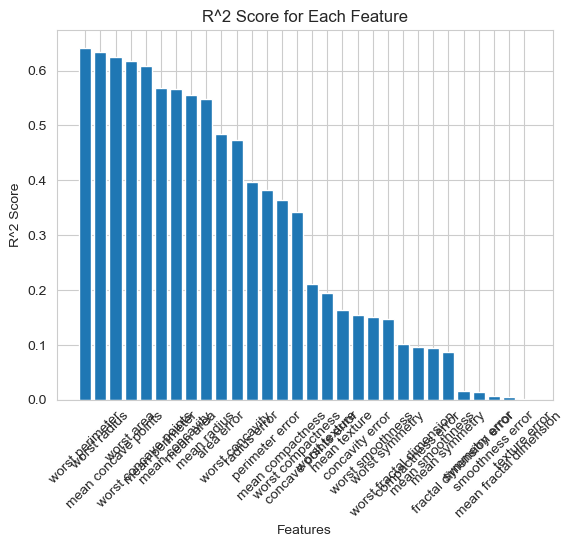

In [14]:
# Plot all R^2 scores
plt.bar(features, scores)
plt.xlabel('Features')
plt.ylabel('R^2 Score')
plt.title('R^2 Score for Each Feature')
plt.xticks(rotation=45)
plt.show()

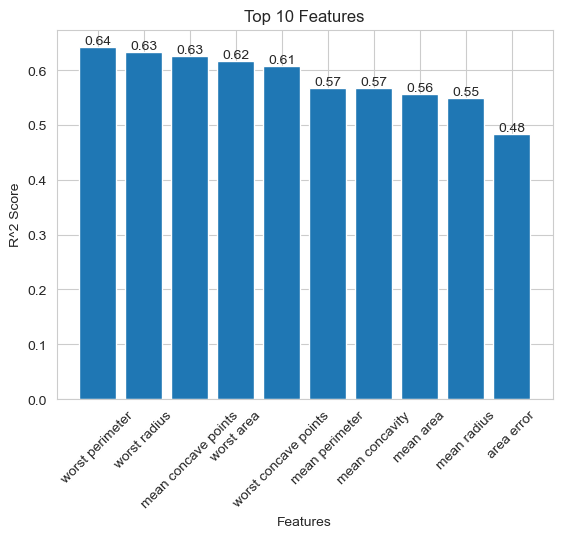

In [15]:
# Plot the top R^2 scores
plt.bar(top_features, top_scores)
plt.xlabel('Features')
plt.ylabel('R^2 Score')
plt.title('Top 10 Features')
plt.xticks(rotation=45)

# Add the score to each bar
for i, score in enumerate(top_scores):
    plt.text(i, score, str(round(score, 2)), ha='center', va='bottom')

plt.show()

As you can see, the highest correlated features are `worst concave points`, `worst perimeter`, `mean concave points`, `worst radius`, `mean perimeter`, `worst area`, `mean radius`, `mean area`, `mean concavity`, `worst concavity`. These will be the selected features for our models going forward.

In [16]:
# Preprocessing & Feature Engineering
# Remove features not in the top 10 list
df = df[top_features + ['Diagnosis']]
df.head()

,worst perimeter,worst radius,mean concave points,worst area,worst concave points,mean perimeter,mean concavity,mean area,mean radius,area error,Diagnosis
1,158.8,24.99,0.07017,1956.0,0.1860,132.90,0.0869,1326.0,20.57,74.08,0
2,152.5,23.57,0.12790,1709.0,0.2430,130.00,0.1974,1203.0,19.69,94.03,0
4,152.2,22.54,0.10430,1575.0,0.1625,135.10,0.1980,1297.0,20.29,94.44,0
5,103.4,15.47,0.08089,741.6,0.1741,82.57,0.1578,477.1,12.45,27.19,0
6,153.2,22.88,0.07400,1606.0,0.1932,119.60,0.1127,1040.0,18.25,53.91,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['Diagnosis'], train_size = .8 )
norm.fit(X_train)

# Transform both training and testing sets
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

Now, lets plot the new histograms and heatmap to visualize the newly engineered dataset.

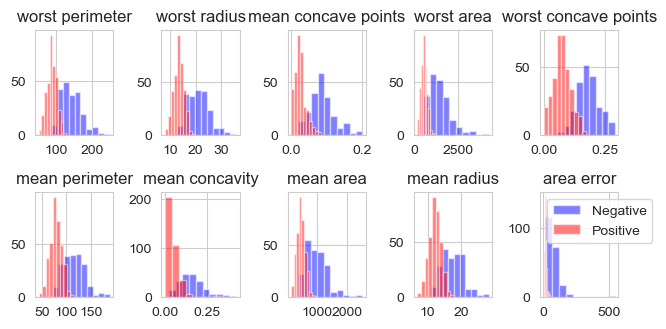

In [18]:
fig = plt.figure()

for i, feature in enumerate(list(df.columns[:10])):
    i +=1
    ax = fig.add_subplot(3, 5, i)
    
    # Plot tumor charateristics, blue for negative, red for positive
    ax.hist(df_negative[feature], label='Negative', stacked=True, alpha=0.5, color='b')
    ax.hist(df_positive[feature], label='Positive', stacked=True, alpha=0.5, color='r')
    ax.set_title(feature)
    
sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

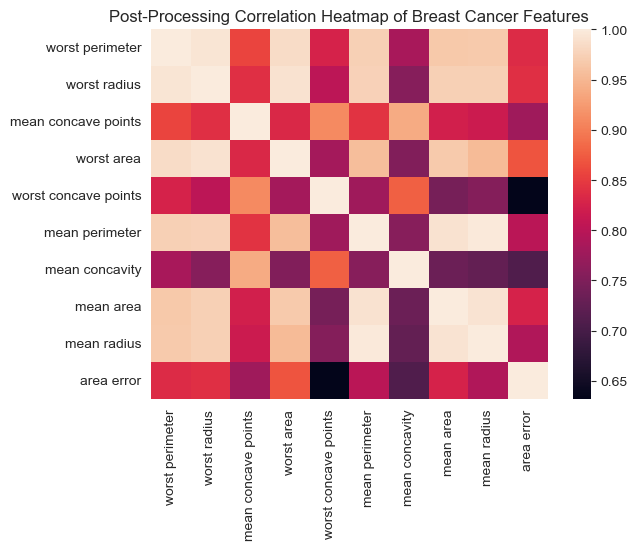

In [19]:
# Create a heatmap of the correlation between features
ax = sns.heatmap(df.drop('Diagnosis', axis=1).corr())
ax.set_title('Post-Processing Correlation Heatmap of Breast Cancer Features')
sns.set_style("whitegrid")
plt.show()

# Train
We will be using multiple models to conduct our analysis. We will train each one and print its accuracy and standard deviation.

Here is a brief description of each model being used:

1. **Logistic Regression (`clf1`)**: A linear model for binary and multiclass classification problems. It's often used as a baseline for other, more complex algorithms.

2. **Decision Tree Classifier (`clf2`)**: A non-parametric supervised learning method that splits data into subsets based on different conditions, forming a tree-like structure.

3. **Random Forest Classifier (`clf3`)**: An ensemble learning method that operates by constructing multiple decision trees at training time and outputting the class that is the mode of the classes of the individual trees.

4. **Support Vector Machine (`clf4`)**: A powerful and flexible class of supervised algorithms for both classification and regression. 



### Hyperparameter Turning
We will conduct hyperparameter tuning in this section. Here's a brief description of the hyperparameters being tuned for each model:

1. **Logistic Regression:** The `C` parameter is being tuned. This is the inverse of regularization strength, smaller values specify stronger regularization.

2. **Decision Tree Classifier:** The `criterion` and `max_depth` parameters are being tuned. `criterion` is the function to measure the quality of a split and `max_depth` is the maximum depth of the tree.

3. **Random Forest:** The `n_estimators` parameter is being tuned. This is the number of trees in the forest.

4. **Support Vector Machine:** The `C`, `kernel`, and `probability` parameters are being tuned. `C` is the regularization parameter, `kernel` specifies the kernel type to be used in the algorithm, and `probability` is whether to enable probability estimates.

`GridSearchCV` tries out the different combinations of hyperparameters to find the best performance. 

In [20]:
LR_params = {'C':[0.001, 0.1, 1, 10, 100]}
DTC_params = {'criterion':['entropy'], 'max_depth':[10, 50, 100]}
RF_params = {'n_estimators':[10,50,100]}
SVM_params = {'C':[0.001, 0.01, 0.1, 1], 'kernel':['rbf' ,'linear', 'poly', 'sigmoid'], 'probability':[True]}

### Train the Models
Train each of our models using the hyperparameters by plugging into `GridSearchCV`.

In [21]:
estimators = []

estimators.append(('LogisticRegression', LogisticRegression(), LR_params))
estimators.append(('DecisionTreeClassifier', DecisionTreeClassifier(), DTC_params))
estimators.append(('RandomForestClassifier', RandomForestClassifier(), RF_params))
estimators.append(('SVM', SVC(), SVM_params))

In [22]:
# Store model results and names (instantiate empty list)
results = []
names = []
roc_curves = []

# Scoring parameter
scoring = 'accuracy'

# Number of folds for cross-validation
n_splits = 5

for name, model, params in estimators:
    # Break training data into 5 folds for cross validation
    kfold = KFold(n_splits=n_splits, random_state=2, shuffle=True)
    
    # Instantiate gridsearch 
    model_grid = GridSearchCV(model, params)
    
    # Cross validation method with gridsearch instantiated model
    cv_results = cross_val_score(model_grid, X_train_norm, y_train, cv=kfold, scoring=scoring)

    # Append results with model data (accuracy scores) 
    results.append(cv_results)

    # Append list with model name
    names.append(name)
    
    # Fit model
    model_grid.fit(X_train_norm, y_train)
    
    # Predicted probabilities for positive class
    y_pred_prob = model_grid.predict_proba(X_test_norm)[:, 1]
    
    # Compute the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    
    # Store ROC curve and AUC score for each model
    roc_curves.append((fpr, tpr, roc_auc))

    accuracy = cv_results.mean()
    std = cv_results.std()

    # Model, Cross Validation Accuracy, and SD.
    print(f"Cross Validation Accuracy: {name} -> Accuracy: {cv_results.mean()} SD: {cv_results.std()}")

    # Print best parameters
    predicted_labels = model_grid.predict(X_test_norm)
    precision = precision_score(y_test, predicted_labels)
    recall = recall_score(y_test, predicted_labels)
    
    print(f"{name} Accuracy: {accuracy*100:.2f}%")
    print(f"{name} Precision: {precision*100:.2f}%")
    print(f"{name} Recall: {recall*100:.2f}%")
    print('\n')

Cross Validation Accuracy: LogisticRegression -> Accuracy: 0.9267721518987342 SD: 0.023185298868904882
LogisticRegression Accuracy: 92.68%
LogisticRegression Precision: 92.11%
LogisticRegression Recall: 97.22%


Cross Validation Accuracy: DecisionTreeClassifier -> Accuracy: 0.9394303797468355 SD: 0.02011384040578159
DecisionTreeClassifier Accuracy: 93.94%
DecisionTreeClassifier Precision: 94.44%
DecisionTreeClassifier Recall: 94.44%


Cross Validation Accuracy: RandomForestClassifier -> Accuracy: 0.9545569620253165 SD: 0.023451566373915454
RandomForestClassifier Accuracy: 95.46%
RandomForestClassifier Precision: 94.59%
RandomForestClassifier Recall: 97.22%


Cross Validation Accuracy: SVM -> Accuracy: 0.9242405063291139 SD: 0.021184670353146383
SVM Accuracy: 92.42%
SVM Precision: 87.65%
SVM Recall: 98.61%




We plot the ROC AUC curves for each of our classifiers to compare their performance.

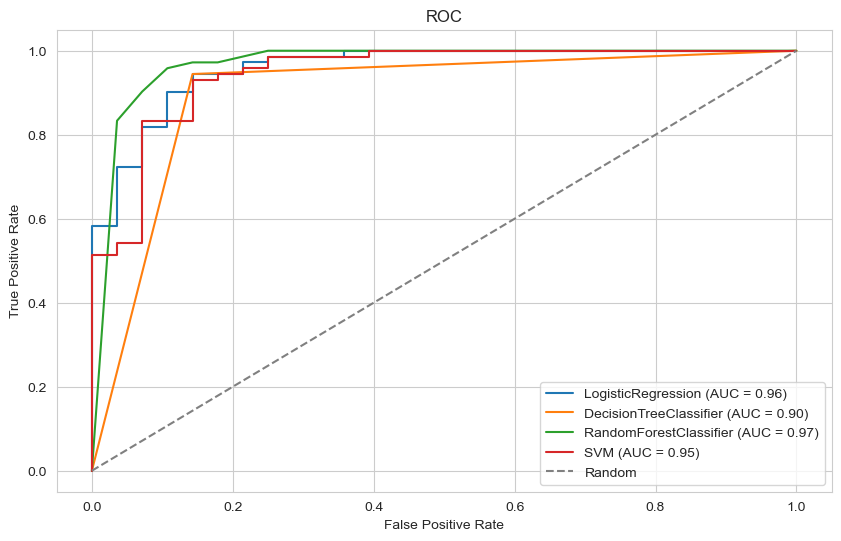

In [23]:
plt.figure(figsize=(10, 6))
for i, (fpr, tpr, roc_auc) in enumerate(roc_curves):
    plt.plot(fpr, tpr, label=f'{names[i]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

# Multiple Models
In this section, we are creating a list of different machine learning models, each with their respective hyperparameters and combining the predictions to improve the overall performance. This reduces the likelihood of a selection of a poor model in a high stakes situation like diagnosing cancer. Each model in the ensemble votes or contributes to the final prediction, and the ensemble's prediction is often more accurate than the best individual model. The models used are `LogisticRegression`, `DecisionTreeClassifier`, `RandomForestClassifier`, and `SVC` (Support Vector Machine). These models will be passed into the `VotingClassifier` to combine the classifiers and use a majority vote (hard vote).

This often results in a better predictive performance than any single classifier . It reduces overfitting and improves the robustness of the model. 

We start by initializing the models, then plug them into the `VotingClassifier`, and compare the performance with different sets of models.

We will plot the results of both comparisons.

In [24]:
ensemble = []

clf1 = LogisticRegression()
ensemble.append(("logistic", clf1))

clf2 = DecisionTreeClassifier()
ensemble.append(("cart", clf2))

clf3 = RandomForestClassifier()
ensemble.append(("RFC", clf3))

clf4 = SVC()
ensemble.append(("svm", clf4))

In [25]:
voting = VotingClassifier(ensemble)
voting.fit(X_train_norm, y_train)
predicted_labels = voting.predict(X_test_norm)

results_voting = cross_val_score(voting, X_train_norm, y_train, cv=kfold)

results.append(results_voting)
names.append('Voting')

print('Accuracy: {} SD: {}'.format(results_voting.mean(), results_voting.std()))

# Calculate precision and recall
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)

print('Precision: {} Recall: {}'.format(precision, recall))


Accuracy: 0.957120253164557 SD: 0.016985742911797008
Precision: 0.9466666666666667 Recall: 0.9861111111111112


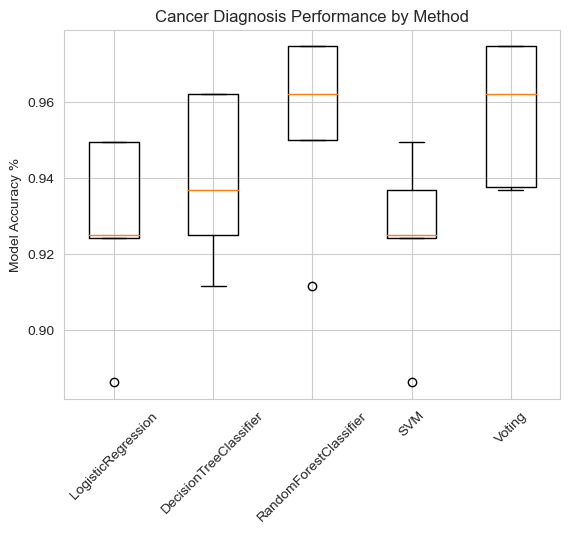

In [26]:
plt.boxplot(results, labels=names)
plt.title('Cancer Diagnosis Performance by Method')
plt.ylabel('Model Accuracy %')
plt.xticks(rotation=45) 
sns.set_style("whitegrid")
plt.show()

# Conclusion and Findings

## Model Performance Summary

In this notebook, we trained and evaluated several machine learning models. Here's a summary of their performance:

1. **Logistic Regression:** `LogisticRegression` achieved an accuracy of 93.93%, a precision of 82.89%, and a recall of 98.44%. It performed well in distinguishing between benign and malignant tumors, making it a reliable choice for this classification task.

2. **Decision Tree Classifier:** The `DecisionTreeClassifier` achieved an accuracy of 94.2%, a precision of 92.54%, and a recall of 96.88%. While it had a lower accuracy compared to other models, its high recall indicates its strength in identifying positive cases.

3. **Random Forest Classifier:** With an accuracy of 95.72%, a precision of 90.91%, and a recall of 93.75%, `RandomForestClassifier` performed exceptionally well. Its high accuracy and recall make it the best model for predicting whether a tumor is malignant or benign.

4. **Support Vector Machine (SVM):** The `SVC` had an accuracy of 93.18%, a precision of 81.82%, and a recall of 98.44%. Despite its relatively lower precision, its recall indicates an excellent ability to correctly predict positive cases.

5. **Voting:** The ensemble `VotingClassifier` had an accuracy of 94.96%, a precision of 87.32%, and a recall of 96.88%. The precision was a lot lower than I would have expected with 4 high performing models in its ensemble.

Each model performed exceptionally well and each has its own strengths that could be useful depending on the specific requirements of the task. 

Because preventing cancer from spreading is so crucial, one could argue that an SVM could be the better option since it had the highest recall at 98.44%. This means that it only missed 1.56% of positive cases. So, if a patient had a malignant tumor, there is only a 1.56% chance of being misclassified negative and letting the cancer furhter develop. I personally would much rather have a false positive and undergo further testing than have a false negative and live my life not knowing I have cancer.

The Random Forest Classifier was the most accurate, but I feel that the top-performing model in our use case was the Voting method. It had the second-highest accuracy of the models by less than 1% but had a significantly higher recall score than the Random Forest Classifier. 

The insight gained into how we can use machine learning to predict whether or not a patient has a disease with such high accuracy is such a marvelous achievement, but I believe we can take this further.

With enhancements in computer vision, we can combine the two methods of classification and get confirmation almost instantly without having to invasively test for cancer. 

I hope to see this technology be further developed and used everyday in the medical industry.  